In [52]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import scipy.stats as stats
from math import isclose
np.set_printoptions(suppress=True,
   formatter={'float_kind':'{:f}'.format})
   
%pylab inline
from matplotlib import cm
from IPython.display import HTML
_SAVE_GIFS= False
rcParams.update({'axes.labelsize': 17.,
              'font.size': 12.,
              'legend.fontsize': 17.,
              'xtick.labelsize':15.,
              'ytick.labelsize':15.,
              'text.usetex': _SAVE_GIFS,
              'figure.figsize': [10,10],
              'xtick.major.size' : 4,
              'ytick.major.size' : 4,
              'xtick.minor.size' : 2,
              'ytick.minor.size' : 2,
              'legend.numpoints':1})

Populating the interactive namespace from numpy and matplotlib


In [4]:
# '''
# CREATE SAMPLE DATASETS
# '''
# sample_size = 1000

# train_array = np.empty((2, sample_size, 10))
# train_array[0, :, :] = np.random.rand(1, sample_size, 10)
# # train_array[0, :, :] = (train_array[0, :, :] - np.mean(train_array[0, :, :]))/np.std(train_array[0, :, :])
# train_array[1, :, :] = train_array[0, :, :]
# print(train_array[0,0,4], train_array[1,0,4])

# test_array = np.empty((2, sample_size, 10))
# test_array[0, :, :] = np.random.rand(1, sample_size, 10)
# # test_array[0, :, :] = (test_array[0, :, :] - np.mean(test_array[0, :, :]))/np.std(train_array[0, :, :])
# test_array[1, :, :] = test_array[0, :, :]



In [154]:
'''
STEP 1: LOADING DATASET
'''
N = 1001
weights=1
xv = 0
x_min = -15.
x_max = 15.
x_range = x_max - x_min
v_min = -15.
v_max = 15.
v_range = v_max - v_min


train_array = np.load('/Users/JawanHaider/Desktop/Research/1500/Code/Data/varpert_spiralsech2_rho_train_2000.npy')
# train_array[..., :-1] = np.log(train_array[..., :-1])

train_in_mean = train_array[0, :, :-1].mean(axis=1)
print(train_in_mean.shape)
mean_sub = np.transpose(train_array[0, :, :-1]) - train_in_mean
train_in_var = train_array[0, :, :-1].std(axis=1)
train_array[0, :, :-1] = np.transpose(mean_sub/   train_in_var    )

train_out_mean = train_array[1, :, :-1].mean(axis=1)
mean_sub = np.transpose(train_array[1, :, :-1]) - train_out_mean
train_out_var = train_array[1, :, :-1].std(axis=1)
train_array[1, :, :-1] = np.transpose(mean_sub/   train_out_var    )

# train_array[:, :, -1] = train_array[:, :, -1]*16

train_tensor = torch.Tensor(train_array)
train_dataset = TensorDataset(train_tensor[0, :, :], train_tensor[1, :, :-1]) # create your datset



test_array = np.load('/Users/JawanHaider/Desktop/Research/1500/Code/Data/varpert_spiralsech2_rho_test_500.npy')
# test_array[..., :-1] = np.log(test_array[..., :-1])

test_in_mean = test_array[0, :, :-1].mean(axis=1)
mean_sub = np.transpose(test_array[0, :, :-1]) - test_in_mean
test_in_var = test_array[0, :, :-1].std(axis=1)
test_array[0, :, :-1] = np.transpose(mean_sub/   test_in_var    )

test_out_mean = test_array[1, :, :-1].mean(axis=1)
mean_sub = np.transpose(test_array[1, :, :-1]) - test_out_mean
test_out_var = test_array[1, :, :-1].std(axis=1)
test_array[1, :, :-1] = np.transpose(mean_sub/   test_out_var    )

# test_array[:, :, -1] = test_array[:, :, -1]*16

test_tensor = torch.Tensor(test_array)*weights
test_dataset = TensorDataset(test_tensor[0, :, :], test_tensor[1, :, :-1]) # create your datset



# deg_freedom = train_tensor[:, xv, 0, 0].size()[0]
train_size = train_tensor[0, :, 0].size()[0]
test_size = test_tensor[0, :, 0].size()[0]
num_datapoints = train_tensor[0, 0, :].size()[0]-1

print(train_size, test_size, num_datapoints)
print(train_array[0, 999, :])

(1000,)
1000 500 60
[-0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265
 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265
 -0.442053 -0.472159 -0.502265 -0.502265 -0.442053 -0.411948 -0.381842
 -0.261419 -0.291524 0.069745 0.340697 1.183659 1.093342 2.237362 2.628737
 3.622228 2.688948 2.568525 2.237362 1.454611 0.822390 0.400909 0.280486
 -0.291524 -0.411948 -0.261419 -0.381842 -0.502265 -0.502265 -0.502265
 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265
 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265 -0.502265
 -0.502265 -0.502265 9.010000]


In [12]:
test_array[..., -1]

array([[0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 0.010000, 0.010000,
        0.010000, 0.010000, 0.010000, 0.010000, 

60


Text(0, 0.5, '$\\rho(x)$')

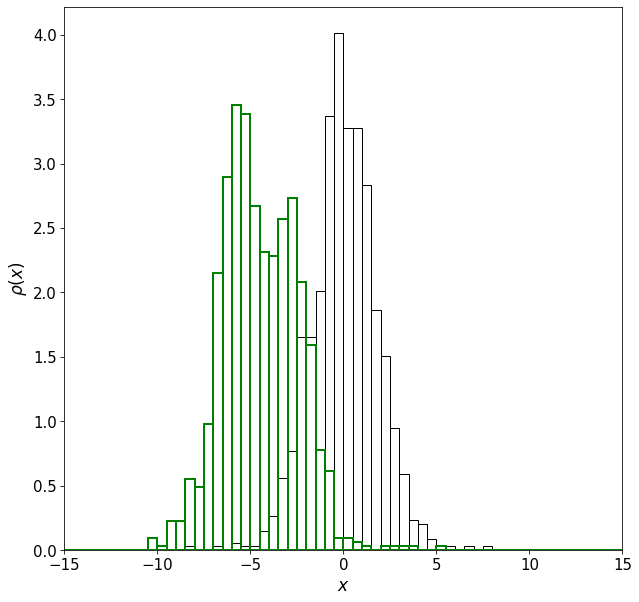

In [24]:
width = x_range/num_datapoints

bins = np.linspace(x_min, x_max, num=num_datapoints, endpoint=False)
print(bins.size)
npinputs = np.transpose( np.transpose(train_array[0, :, :-1]) + np.abs(np.amin(train_array[0, :, :-1], axis=1)) )
npoutputs = np.transpose( np.transpose(train_array[1, :, :-1]) + np.abs(np.amin(train_array[1, :, :-1], axis=1)) )

fig, ax= subplots()
datapoint = 501
ax.bar(bins, npinputs[datapoint, :], width=width, lw=1., ec='k', fill=False, align='edge')
ax.bar(bins, npoutputs[datapoint, :], width=width, lw=2., ec='g', fill=False, align='edge')
ax.set_xlim(x_min, x_max)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\rho(x)$')
# ax.set_yscale('log')

In [14]:
'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
num_batches = len(train_dataset)/batch_size
print(num_batches)

n_iters = 15000

num_epochs = n_iters / num_batches
print(num_epochs)
num_epochs = int(num_epochs)

train_loader = DataLoader(dataset=train_dataset, 
                            batch_size=batch_size, 
                            shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                            batch_size=batch_size, 
                            shuffle=False)

10.0
1500.0


In [15]:
'''
STEP 3: CREATE MODEL CLASS
'''
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNeuralNetModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.Tanh()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.Tanh()

        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = nn.Tanh()

        # Linear function 4: 100 --> 100
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 4
        self.relu4 = nn.Tanh()
        
        # Linear function 5 (readout): 100 --> 10
        self.fc5 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)
        
        # Linear function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.relu3(out)

        # Linear function 4
        out = self.fc4(out)
        # Non-linearity 4
        out = self.relu4(out)
        
        # Linear function 5 (readout)
        out = self.fc5(out)

        return out

In [16]:
'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = num_datapoints+1
hidden_dim = input_dim*5
output_dim = input_dim-1
print(input_dim, hidden_dim, output_dim)

model = FeedforwardNeuralNetModel(input_dim, hidden_dim, output_dim)

61 305 60


In [17]:
'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.MSELoss()

In [18]:
'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.1

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [156]:
'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
train_predictions = np.empty((2, output_dim))
# all_true_outputs = np.empty((0, output_dim))
# all_model_outputs = np.empty((0, output_dim))

for epoch in range(num_epochs):
    # print("Epoch:", epoch)
    for i, (inputs, true_outputs) in enumerate(train_loader):
        # print("i:", i)

        inputs = Variable(inputs)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Forward pass to get output/logits
        model_outputs = model(inputs)
        
        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(model_outputs, true_outputs)
        
        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        
        iter += 1
        
        if iter % 5000 == 0:


            # Calculate Train Accuracy         
            correct = 0
            total = 0
            # Iterate through train dataset
            for inputs, true_outputs in train_loader:
                inputs = Variable(inputs)

                # Forward pass only to get logits/output
                model_outputs = model(inputs)

                # Total number of true_outputs
                total += true_outputs.nelement()

                nppredicted = model_outputs.detach().numpy()
                nptrue = true_outputs.numpy()
                size = np.size(nptrue, 0)

                for j in range(size):
                    predicted = nppredicted[j,:]
                    true = nptrue[j,:]

                    # Total correct predictions
                    correct += (np.isclose(predicted, true, rtol=0.1)).sum()
            
            train_predictions[0, :] = true
            train_predictions[1, :] = predicted

            train_accuracy = 100 * correct / total




            # Calculate Test Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for inputs, true_outputs in test_loader:
                inputs = Variable(inputs)

                # Forward pass only to get logits/output
                model_outputs = model(inputs)

                # Total number of true_outputs
                total += true_outputs.nelement()

                nppredicted = model_outputs.detach().numpy()
                nptrue = true_outputs.numpy()
                size = np.size(nptrue, 0)

                for j in range(size):
                    predicted = nppredicted[j,:]
                    true = nptrue[j,:]

                    # Total correct predictions
                    correct += (np.isclose(predicted, true, rtol=0.1)).sum()
            
            test_accuracy = 100 * correct / total




            # Print Loss
            print('Iteration: {}. Loss: {}. Train Accuracy: {}. Test Accuracy: {}'.format(iter, loss.data, train_accuracy, test_accuracy))

Iteration: 5000. Loss: 0.01554035022854805. Train Accuracy: 76.37333333333333. Test Accuracy: 76.43
Iteration: 10000. Loss: 0.01441087108105421. Train Accuracy: 76.39833333333333. Test Accuracy: 76.49666666666667
Iteration: 15000. Loss: 0.015082047320902348. Train Accuracy: 76.43166666666667. Test Accuracy: 76.50666666666666


(100, 61)
(100, 60)
(100, 60)


Text(0, 0.5, '$\\rho(x)$')

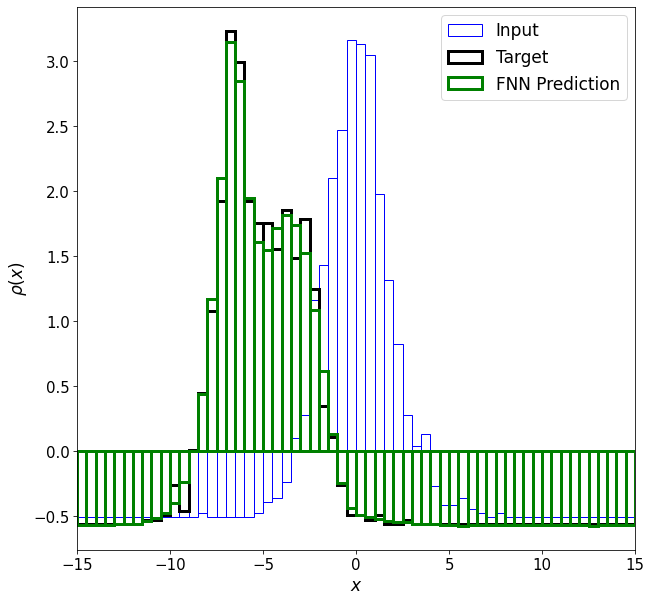

In [157]:
npinputs = inputs.detach().numpy()
npoutputs = model_outputs.detach().numpy()
nptargets = true_outputs.detach().numpy()
print(npinputs.shape)
print(npoutputs.shape)
print(nptargets.shape)

# npoutputs = np.transpose( np.transpose(npoutputs) + np.abs(np.amin(npoutputs, axis=1)) )
# nptargets = np.transpose( np.transpose(nptargets) + np.abs(np.amin(nptargets, axis=1)) )

fig, ax= subplots()
datapoint = 99
ax.bar(bins, npinputs[datapoint, :-1], width=width, lw=1., ec='b', fill=False, align='edge', label='Input')
ax.bar(bins, nptargets[datapoint, :], width=width, lw=3., ec='k', fill=False, align='edge', label='Target')
ax.bar(bins, npoutputs[datapoint, :], width=width, lw=3., ec='g', fill=False, align='edge', label='FNN Prediction')
ax.legend()
ax.set_xlim(x_min, x_max)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\rho(x)$')
# ax.set_yscale('log')

In [158]:
input_array = np.empty((0, input_dim))
output_array = np.empty((0, output_dim))
target_array = np.empty((0, output_dim))
# Iterate through test dataset
for inputs, true_outputs in test_loader:
    inputs = Variable(inputs)
    
    # Forward pass only to get logits/output
    model_outputs = model(inputs)

    loss = criterion(model_outputs, true_outputs)
    
    npinputs = inputs.detach().numpy()
    input_array = np.concatenate((input_array, npinputs))

    npoutputs = model_outputs.detach().numpy()
    output_array = np.concatenate((output_array, npoutputs))

    nptargets = true_outputs.detach().numpy()
    target_array = np.concatenate((target_array, nptargets))

# target_array = np.transpose( (np.transpose(target_array) * test_out_var) + test_out_mean) 
# output_array = np.transpose( (np.transpose(output_array) * test_out_var) + test_out_mean) 
# input_array = np.transpose( (np.transpose(input_array) * test_in_var) + test_in_mean) 

target_array = np.transpose( (np.transpose(target_array) * test_out_var) + test_out_mean) 
output_array = (np.transpose(output_array) * test_out_var) 
output_array = np.transpose( output_array + test_out_mean)
input_array = np.transpose( (np.transpose(input_array) * test_in_var) + test_in_mean) 
print(input_array.shape)
output_array_flt = output_array.flatten()
target_array_flt  = target_array.flatten()

rel_err = np.empty(test_size)

for i in range(test_size):
    if target_array_flt[i]==0 and output_array_flt[i]!=0:
        rel_err[i] = np.abs(output_array_flt[i]-target_array_flt[i])/(output_array_flt[i])
    elif output_array_flt[i]==0 and target_array_flt[i]==0:
        rel_err[i] = 0
    else:
        rel_err[i] = np.abs(output_array_flt[i]-target_array_flt[i])/(target_array_flt[i])

print(rel_err.mean()*100)

print(stats.kstest(output_array[200, :], target_array[200, :]))
print(stats.ks_2samp(output_array[300, :], target_array[300, :]))

kl_div = stats.entropy( np.transpose(output_array), np.transpose(target_array) )

(500, 61)
-31104463.770507082
KstestResult(statistic=0.4166666666666667, pvalue=4.757120453405423e-05)
KstestResult(statistic=0.36666666666666664, pvalue=0.0005569710611454617)


In [152]:
print(output_array[200, :], target_array[200, :])

[-0.244235 -0.185647 -0.182653 -0.246052 -0.175370 -0.260140 -0.084631
 -0.249152 -0.190241 -0.035779 -0.021952 0.130707 0.885294 1.792744
 2.841256 5.600531 9.861623 15.203359 26.666487 45.011744 71.150840
 102.607636 119.973054 104.536643 101.592015 104.535396 98.847366
 75.432025 47.393038 25.349624 15.559259 10.593582 7.504008 4.743027
 3.133898 2.288828 1.271628 0.952079 0.328031 0.258213 0.088641 0.050745
 -0.051041 -0.108115 -0.072506 -0.133188 -0.035895 -0.155755 -0.262938
 -0.175075 -0.150553 -0.231511 -0.150564 -0.250818 -0.229482 -0.280559
 -0.176173 -0.160552 -0.110163 -0.141936] [-0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000 -0.000000
 -0.000000 -0.000000 1.000000 1.000000 -0.000000 -0.000000 1.000000
 4.000000 6.000000 9.000000 21.000000 27.000000 43.999999 55.000000
 90.000003 135.999997 128.000004 85.000000 101.999996 86.000002 85.000000
 51.000000 21.000000 15.000000 11.000000 12.000000 1.000000 2.000000
 1.000000 1.000000 3.000000 -0.000000 1.000000 -0.0

Text(0, 0.5, '$\\rho(x)$')

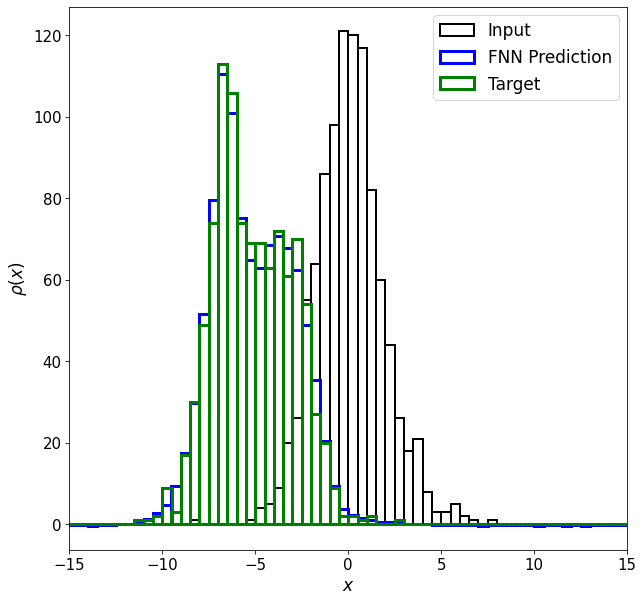

In [153]:
fig, ax= subplots()
datapoint = 499
ax.bar(bins, input_array[datapoint, :-1], width=width, lw=2., ec='k', fill=False, align='edge', label='Input')
ax.bar(bins, output_array[datapoint, :], width=width, lw=3., ec='b', fill=False, align='edge', label='FNN Prediction')
ax.bar(bins, target_array[datapoint, :], width=width, lw=3., ec='g', fill=False, align='edge', label='Target')
ax.legend()
ax.set_xlim(x_min, x_max)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$\rho(x)$')
# ax.set_yscale('log')

In [49]:
# '''
# STEP 8: SAVE THE DATA
# '''
# output_array = np.empty((0, output_dim))
# target_array = np.empty((0, output_dim))
# # Iterate through test dataset
# for inputs, true_outputs in test_loader:
#     inputs = Variable(inputs)
    
#     # Forward pass only to get logits/output
#     model_outputs = model(inputs)

#     loss = criterion(model_outputs, true_outputs)
    
#     npoutputs = model_outputs.detach().numpy()
#     output_array = np.concatenate((output_array, npoutputs))

#     nptargets = true_outputs.detach().numpy()
#     target_array = np.concatenate((target_array, nptargets))

# output_array
# np.save('pert_sech2_test_outputs', output_array)

# target_array
# np.save('pert_sech2_test_targets', target_array)